# Proyecto final DataUY - Modelo Predictivo de Ingresos en EE.UU.: Análisis del dataset "Adult", del Censo de 1994

#1. Introducción

El presente trabajo, consiste en un análisis de datos, y modelado de una inteligencia artificial, a partir de un conjunto de datos denominado "adult", proveniente del [censo de los Estados Unidos en el año 1994](https://archive.ics.uci.edu/dataset/2/adult).

El objetivo principal de este proyecto, es analizar los datos brindados por el censo analizando patrones, y buscando posibles desigualdades en los Estados Unidos en el año 1994. También se construirá un modelo capaz de predecir con cierto grado de certeza, si una persona gana más o menos de 50.000 dólares anuales. El dataset a utilizar para entrenar el modelo contiene 30014 filas de datos tras depurar, y tiene las siguientes columnas:

*   **Edad**
*   **Sector laboral**
*   **Peso muestral (Cuantas personas están representadas por los datos presentes en determinada fila)**
*   **Educación formal en años**
*   **Estado civil**
*   **Área laboral**
*   **Relación con el jefe/a de hogar**
*   **Grupo étnico**
*   **Sexo**
*   **Ganancias sobre el capital invertido durante el último año**
*   **Pérdidas sobre el capital invertido durante el último año**
*   **Carga laboral semanal**
*   **País de origen**
*   **Ingreso anual**



#2. Objetivos.

1. Explorar desigualdades salariales por género y raza:
    * Analizar la distribución del nivel de ingresos (mayor o menor a 50K) entre hombres y mujeres, identificando posibles brechas salariales y sus causas.

2. Evaluar el impacto del nivel educativo en los ingresos:
    * Investigar la relación entre los años de educación formal y la proporción de personas con ingresos altos, desglosando esta información por género y carga horaria.

3. Relacionar el estado civil con la carga laboral:
    * Estudiar cómo influye el estado civil en las horas trabajadas semanalmente, diferenciando entre hombres y mujeres.

4. Detectar correlaciones entre variables claves:
    * Utilizar análisis de correlación para descubrir relaciones significativas entre variables como edad, nivel educativo, horas trabajadas, y capital ganado o perdido.

5. Construir un modelo predictivo de ingresos:
    * Desarrollar un modelo de inteligencia artificial capaz de predecir si una persona gana más o menos de 50.000 dólares anuales, basado en variables sociodemográficas y laborales.





#3. Herramientas y técnicas utilizadas

Para desarrollar el modelo, se hará uso del lenguaje de programación Python, y librerías del mismo.
A continuación se detallan las principales librerías y prácticas a utilizar:


*   **Pandas**: Manipulación, carga, y limpieza de datos.
*   **NumPy**: Permite realizar operaciones numéricas y manejar estructuras matriciales.
*   **Scikit-learn**: Será la herramienta principal para construir el modelo de predicción,
    *   *Preprocesamiento*: se utilizará OneHotEncoder para codificar variables categóricas.
    *   *Entrenamiento del modelo*
    *   *Evaluación del modelo*: Usando métricas como accuracy, precision, recall y f1-score.
*   **Matplotlib**: Librería interactiva para la creación de gráficos.
*   **Seaborn**: librería para la visualización de datos graficados, basada en Matplotlib.
*   **Display**: Librería para la visualización de datos en tablas.

Además de estas herramientas mencionadas, se realizarán las siguientes transformaciones sobre el dataset inicial, para facilitar y mejorar el entrenamiento del modelo:


*   Eliminación de las filas con valores faltantes (Representados por "?")
*   Eliminación de la columna 'education' por ser redundante con education-num, y esta última ser más adecuada.
*   Codificación de variables categóricas (One-Hot Encoding)



#4. Consideraciones éticas
En este modelo, he decidido **incluir tanto el sexo como la raza** en los datos a utilizar para entrenar el modelo. El razonamiento para llegar a esta decisión, se basa en la premisa de incluir la mayor cantidad de atributos disponibles en el dataset para ayudar a obtener una predicción más precisa en el modelo, dado que dichas características podrían, si bien no estar directamente relacionadas (No ser inherentes al sexo), sí podrían estar correlacionadas con patrones reales de ingreso, que podrían denotar una desigualdad estructural, o elecciones que tienden a tomar personas de un mismo sexo.
No obstante, en el análisis de los datos, se generarán gráficas con el fin de comparar y reflexionar sobre los posibles sesgos que esto podría introducir en el modelo, y la posible existencia de inequidades de género o de discriminación en los ingresos en los Estados Unidos en el año 1994, y en la actualidad.

#Análisis de datos

1. Importo los datos, y librerías que voy a utilizar para el análisis de los datos.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# URLs de los archivos
df_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Nombres de columnas
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Cargo los datasets
df = pd.read_csv(df_url, names=column_names, sep=',', skipinitialspace=True)

#Elimino la columna redundante "education", de ambos datasets, y me quedo con education-num que al ser un número es más fácil de utilizar y analizar.
df.drop(columns=['education'], inplace=True)

#Sustituyo los valores "desconocidos" por nulos
df.replace('?', np.nan, inplace=True)

#Elimino valores de error de muestreo.
df['capital-gain'] = df['capital-gain'].replace(99999, np.nan)
df['capital-loss'] = df['capital-loss'].replace(99999, np.nan)
df = df[~((df['sex'] == 'Male') & (df['relationship'] == 'Wife'))]
df = df[~((df['sex'] == 'Female') & (df['relationship'] == 'Husband'))]

df.dropna(subset=['capital-gain', 'capital-loss'], inplace=True)


#Elimino las filas con valores nulos
df.dropna(inplace=True)


2. Creo un mapa de calor, incluyendo las variables tanto numéricas, como categóricas, utilizando Label Encoding, para obtener un primer acercamiento a las posibles relaciones entre datos.

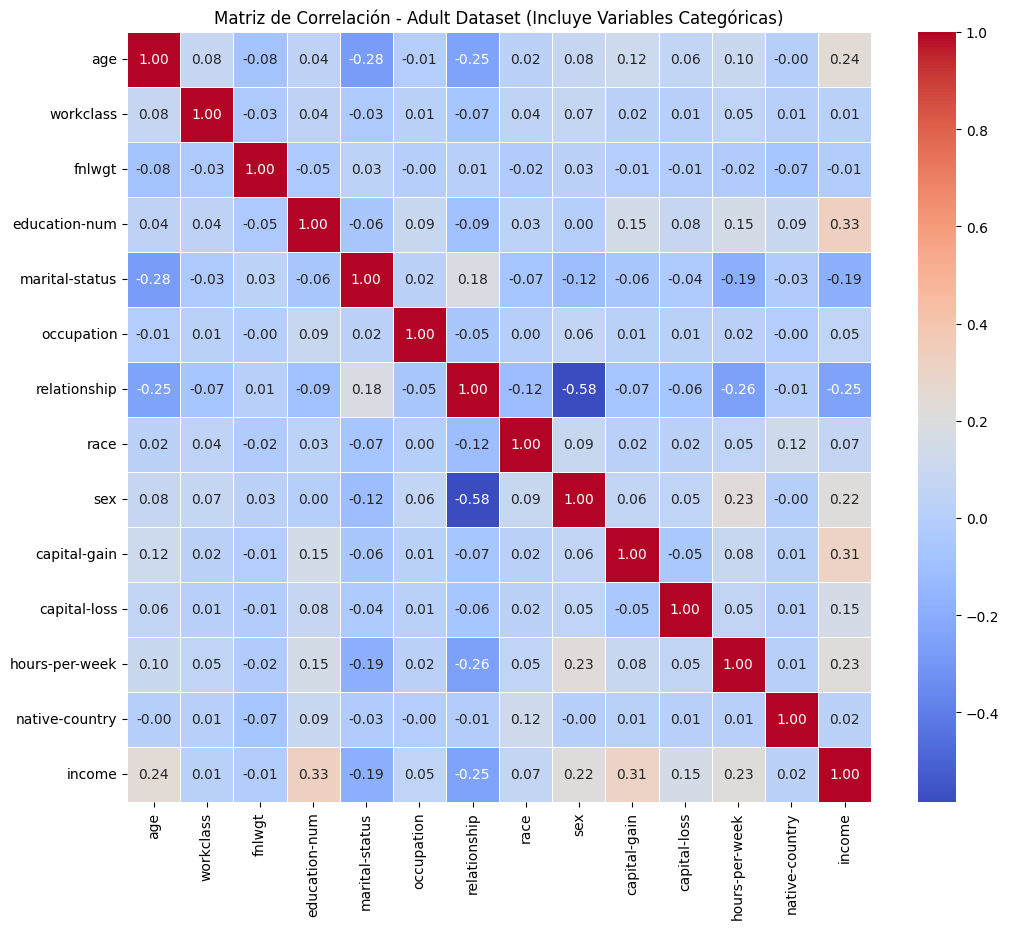

In [ ]:
#Convierto las variables categóricas a numéricas, usando label encoding.
categorical_columns = df.select_dtypes(include=["object"]).columns
df_encoded = df.copy()

# Codifico las columnas categóricas.
for column in categorical_columns:
    df_encoded[column] = df_encoded[column].astype("category").cat.codes

# Calculo la matriz de correlación
correlation_matrix = df_encoded.corr()

# Creo el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Adult Dataset (Incluye Variables Categóricas)")
plt.show()



> De esta matriz de correlación, se puede observar a primera vista, relaciones significativas entre atributos del dataset, y el ingreso. Entre ellas, las más notables siendo el **sexo** de la persona, la **inversión** (*Tanto ganancias como pérdidas capitales muestran un incremento en la tendencia a tener un ingreso mayor a $50k*), **cantidad de horas trabajadas**, **la edad**, y la variable más asociada a un alto nivel de ingreso, los **años de estudio**.


*Ignorar el caso de la relación sex-relationship, no implica causalidad, se da por la forma que se codifican las variables categóricas.*

2. Muestro la distribución de los ingresos, para tener una mejor idea de la distribución

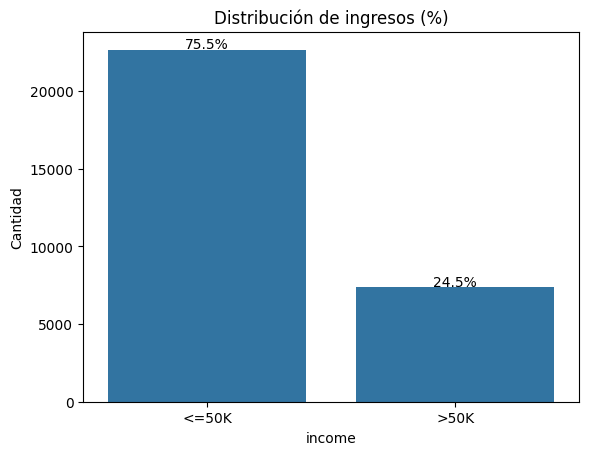

In [ ]:
# Calculo el porcentaje de income mayor y menor a 50k.
income_percent = df['income'].value_counts(normalize=True) * 100

# Asigno el valor del eje de las abscisas, y la unidad del eje de las ordenadas.
ax = sns.countplot(data=df, x='income')
ax.set_ylabel('Cantidad')

# Agrego el símbolo de % sobre el total, al gráfico, para una mejor visualización de los datos.
for bar in ax.patches:
    altura = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, altura + 75,
            f'{altura / len(df) * 100:.1f}%',
            ha='center')

plt.title('Distribución de ingresos (%)')
plt.show()



> Teniendo este gráfico, de acuerdo al censo, el **24.5%** de la población en el año 1994 poseía ingresos superiores a ** $50,000**, podemos realizar una estimación a grosso modo, que **ajustando por inflación, da un valor de 105,000 dólares**. Para determinar si ha habido un crecimiento o disminución en la desigualdad en los Estados Unidos en cuanto a ingresos, podemos observar las cifras oficiales según los últimos estimados en el [último censo de los Estados Unidos en el año 2024](https://data.census.gov/table?q=Earnings%20(Individuals)), donde se estima que un **23% (+-0.1%)** de los Estado Unidenses poseen un ingreso superior a 100.000 dólares, dando un porcentaje similar, o inferior al visto en el censo del año 1994.

3. Distribución total de los ingresos por sexo

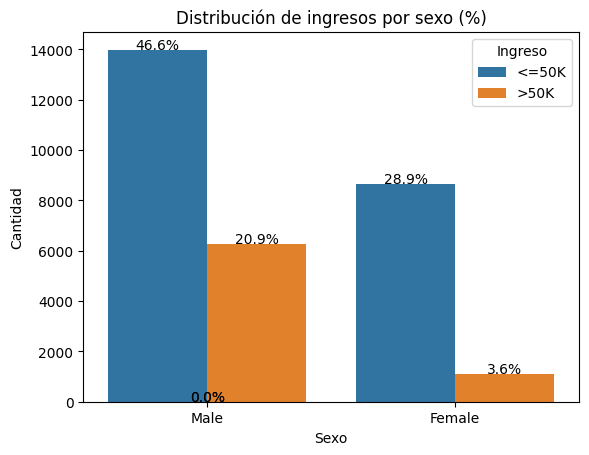

In [ ]:
# Calculo el porcentaje de income mayor y menor a 50k.
income_percent = df['income'].value_counts(normalize=True) * 100

# Gráfico con sex en el eje X, y agrego income como hue
ax = sns.countplot(data=df, x='sex', hue='income')

ax.set_ylabel('Cantidad')
ax.set_xlabel('Sexo')

# Agrego porcentajes encima de cada barra
for bar in ax.patches:
    altura = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, altura + 20,
            f'{altura / len(df) * 100:.1f}%',
            ha='center')

plt.title('Distribución de ingresos por sexo (%)')
plt.legend(title='Ingreso')
plt.show()

> A primera vista, se observa una gran desigualdad en los ingresos dependiendo del sexo de la persona. A posterior se realizarán más gráficos en base al sexo, para buscar la existencia o no de factores externo, atribuibles a esta diferencia.

4. Distribución de ingresos para cada sexo

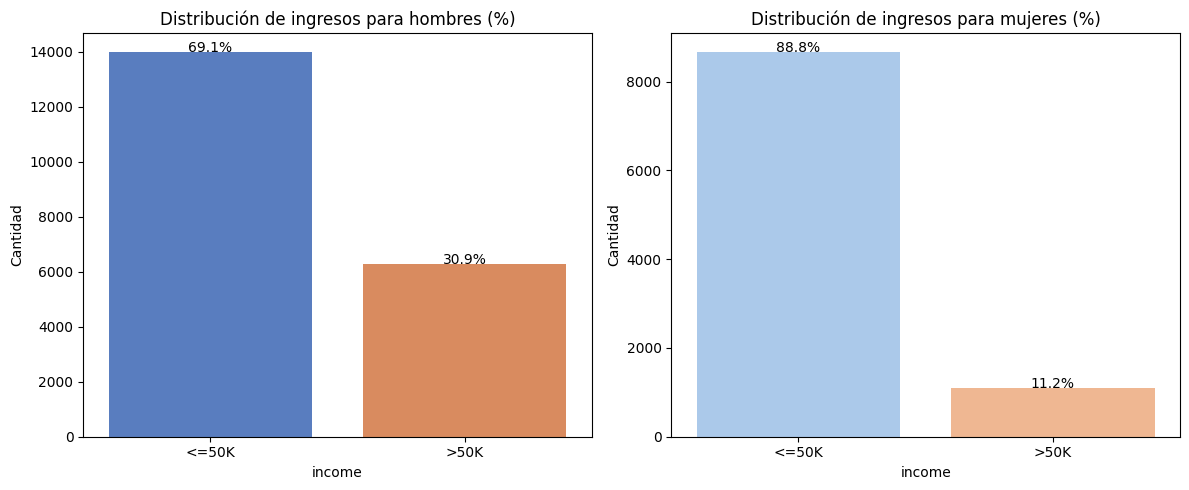

In [ ]:
# creo el subplot para el gráfico.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


# Distribución para Hombre
df_male = df[df['sex'] == 'Male']
sns.countplot(data=df_male, x='income', hue='income', ax=ax1, palette='muted')
total_male = len(df_male)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2, height + 5,
             f'{height/total_male*100:.1f}%',
             ha='center')
ax1.set_title('Distribución de ingresos para hombres (%)')
ax1.set_ylabel('Cantidad')

# Distribución para Mujeres
df_female = df[df['sex'] == 'Female']
sns.countplot(data=df_female, x='income', hue='income', ax=ax2, palette='pastel')
total_female = len(df_female)
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2, height + 5, f'{height/total_female*100:.1f}%', ha='center')

ax2.set_title('Distribución de ingresos para mujeres (%)')
ax2.set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

> Nuevamente, se ve reflejada una importante diferencia porcentual en cuanto a los ingresos por sexo. De acuerdo a los datos más reciente según los últimos estimados en el [último censo de los Estados Unidos en el año 2024](https://data.census.gov/table?q=Earnings%20(Individuals)), esta brecha se ha reducido.
A día de hoy, se ve una disminución en los ingresos relativos de los hombres, bajando hasta un 27.4% (+-0.1%) para los hombres con un ingreso superior a 100,000 dólares, mientras que por el lado de las mujeres, se ha visto un incremento sustancial, desde el **11.2%** en el año 1994, hasta un **17.3%** (+-0.1%) a día de hoy.



5. Años de estudio formal, y la probabilidad total de que dicha persona tenga un ingreso >50k, y carga horaria laboral por sexo

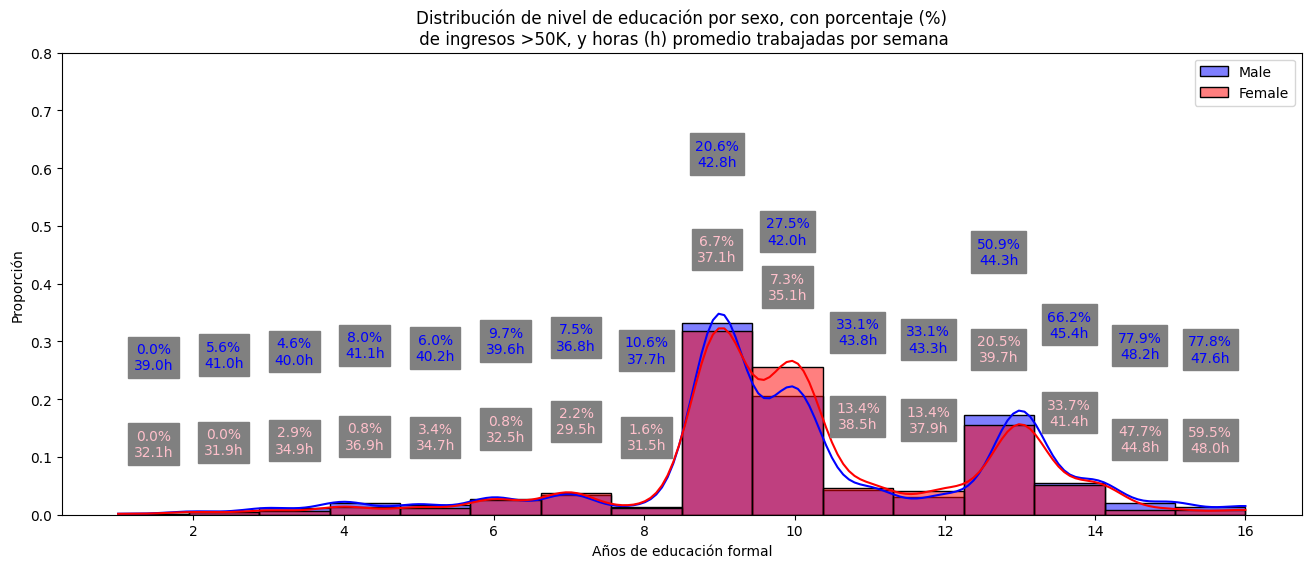

In [ ]:
plt.figure(figsize=(16,6))

# Defino la cantidad de barras en el histograma
bins = 16

# Ploteo los histogramas para cada sexo, su escala, color, tipo, transparencia.
sns.histplot(data=df[df['sex'] == 'Male'], x="education-num", kde=True, bins=bins, stat="probability", color="blue", label="Male", alpha=0.5)
sns.histplot(data=df[df['sex'] == 'Female'], x="education-num", kde=True, bins=bins, stat="probability", color="red", label="Female", alpha=0.5)

# Calculo y agrego los porcentajes de cada nivel de educación por sexo.
for sex, color, y_offset in [('Male', 'blue', 0.25), ('Female', 'pink', 0.1)]:
    # Filtro por sexo
    sex_df = df[df['sex'] == sex]

    # Obtengo los datos del histograma
    hist_data, bin_edges = np.histogram(sex_df['education-num'], bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Recorro cada bin, y agrego el % y horas trabajadas.
    for i, bin_center in enumerate(bin_centers):
        bin_start = bin_edges[i]

        bin_end = bin_edges[i + 1] if i < len(bin_centers) - 1 else len(bin_centers)+1

        bin_df = sex_df[(sex_df['education-num'] >= bin_start) & (sex_df['education-num'] < bin_end)]
        pct = (bin_df['income'] == '>50K').mean() * 100
        avg_hours = bin_df['hours-per-week'].mean()

        # Texto con % y horas promedio
        label_text = f'{pct:.1f}%\n{avg_hours:.1f}h'
        plt.text(bin_center, hist_data[i] + y_offset, label_text, ha='center', backgroundcolor='grey', color=color)

# Escala del histograma
plt.ylim(0, 0.8)

plt.title("Distribución de nivel de educación por sexo, con porcentaje (%)\n de ingresos >50K, y horas (h) promedio trabajadas por semana")
plt.xlabel("Años de educación formal")
plt.ylabel("Proporción")
plt.legend()
plt.show()


> Para tratar de dar sentido a la desigualdad en los ingresos, procedí a graficar las relaciones entre el atributo de nivel educativo,  el cuál posee la mayor coorelación con el ingreso de una persona según el mapa de calor. Como se ve en el gráfico, si bien la desigualdad no desaparece ni mucho menos, se muestra de manera menos pronunciada cuanto más alto es el nivel educativo, pasando de **~3 hombres, por cada 1 mujer con ingreso mayor a 50.000 dólares en el nivel educativo de secundaria**, a **~1.3 hombres, por cada mujer en el máximo nivel educativo.**

> También se pueden evidenciar otra tendencia en las jornadas laborales más cortas en el caso sexo femenino, y más extensas en el caso del masculino. Podrían atribuirse las diferencias en las jornadas laborales más extensas a [roles sociales](https://pmc.ncbi.nlm.nih.gov/articles/PMC10150105/#:~:text=Following%20these%20gender%20stereotypes%2C%20men%20are%20more%20career%20focused%2C%20value%20professional%20advancement%20and%20are%20less%20likely%20to%20shy%20away%20from%20a%20competitive%20work%20atmosphere%20(Konrad%20et%20al.%2C%202000)%2C%20while%20women%20value%20a%20pleasant%2C%20collegial%20working%20environment%20(Williams%20and%20Best%2C%201990)%20and%20are%20less%20career%2Ddriven) como en muchos casos [el hombre ser el sostén económicos en los hogares](https://pmc.ncbi.nlm.nih.gov/articles/PMC10150105/#:~:text=While%20several%20studies%20confirm%20the%20theoretical%20assumption%20that%20men%20place%20more%20value%20on%20higher%20wages%20due%20to%20the%20male%20breadwinner%20gender%20role%20(Wiswall%20and%20Zafar%2C%202018%3B%20Valet%20et%20al.%2C%202021%3B%20Seehuus%2C%202023)), más competitivos, y más enfocados en sus carreras, o [diferencias en las preferencias laborales](https://pmc.ncbi.nlm.nih.gov/articles/PMC10150105/#:~:text=A%20large%20part%20of%20this%20gender%20pay%20gap%20is%20explained%20by%20chosen%20profession%20(Schmid%2C%202016).%20But%20even%20within%20occupations%2C%20women%20earn%20less%20than%20their%20male%20colleagues%20as%20they%20are%20more%20likely%20to%20work%20part%2Dtime) y sus correspondientes diferentes cargas horarias.

6. Carga horaria laboral por estado civil

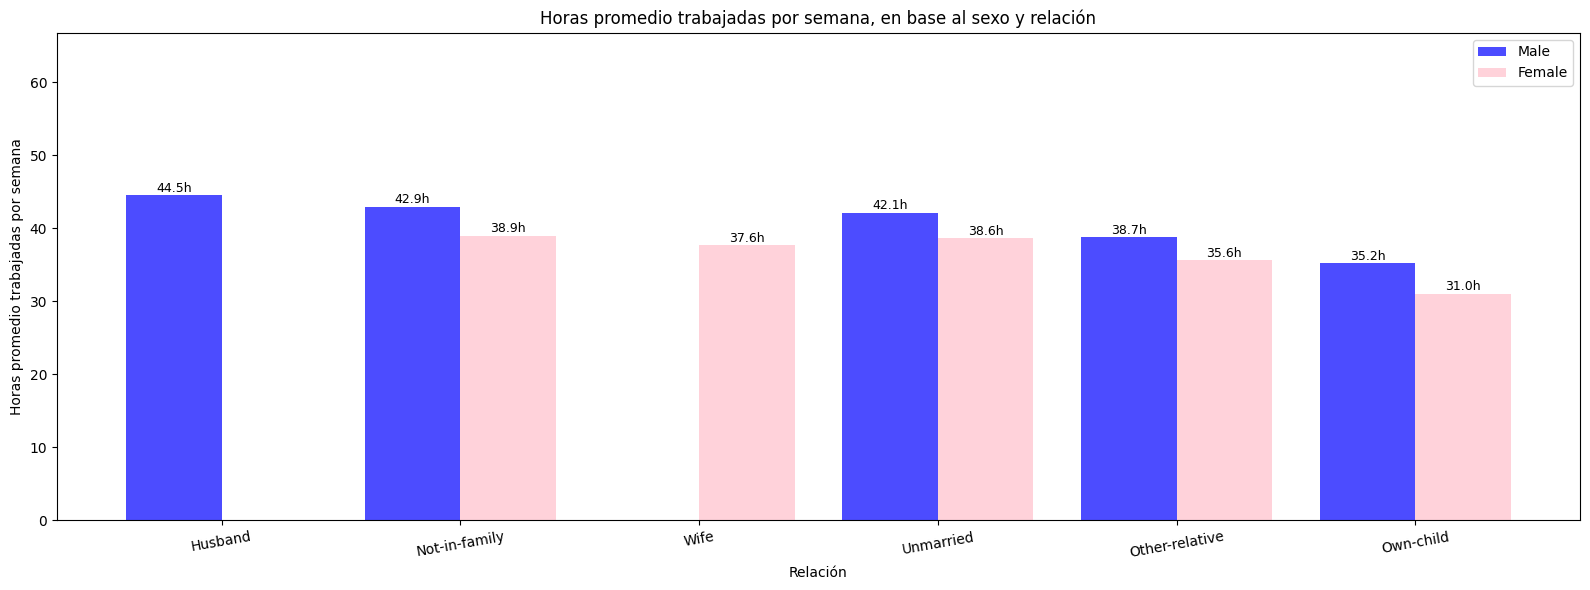

In [ ]:
#Tamaño del gráfico
plt.figure(figsize=(16, 6))

# relaciones únicas
relationships = df['relationship'].unique()

# horas promedio por estado de relación
avg_hours_by_relationship = []


# Loopeo por cada relación, y calculo el promedio de horas para male y female.
for relationship in relationships:
    male_avg_hours = df[(df['sex'] == 'Male') & (df['relationship'] == relationship)]['hours-per-week'].mean()
    female_avg_hours = df[(df['sex'] == 'Female') & (df['relationship'] == relationship)]['hours-per-week'].mean()
    avg_hours_by_relationship.append((relationship, male_avg_hours, female_avg_hours))

# Ordeno el gráfico de mayor a menor, para mejor visualización
avg_hours_by_relationship.sort(key=lambda x: max(x[1], x[2]), reverse=True)

# Extraigo las listas ordenadas de relaciones, y las horas
sorted_relationships = [x[0] for x in avg_hours_by_relationship]
sorted_male_avg_hours = [x[1] for x in avg_hours_by_relationship]
sorted_female_avg_hours = [x[2] for x in avg_hours_by_relationship]

# Posición de las barras
x = np.arange(len(sorted_relationships))
bar_width = 0.4

# Ploteo para cada sexo
for sex, color, offset, avg_hours in [('Male', 'blue', -bar_width/2, sorted_male_avg_hours),
                                      ('Female', 'pink', bar_width/2, sorted_female_avg_hours)]:
    bar_positions = x + offset
    plt.bar(bar_positions, avg_hours, width=bar_width, label=sex, color=color, alpha=0.7)

    # Agrego la etiqueta con las horas a cada barra
    for pos, hours in zip(bar_positions, avg_hours):
        plt.text(pos, hours + 0.5, f'{hours:.1f}h', ha='center', fontsize=9)

# Formateo el plot
plt.ylim(0, max(max(sorted_male_avg_hours), max(sorted_female_avg_hours)) * 1.5)
plt.xticks(x, sorted_relationships, rotation=10)
plt.xlabel("Relación")
plt.ylabel("Horas promedio trabajadas por semana")
plt.title("Horas promedio trabajadas por semana, en base al sexo y relación")
plt.legend()
plt.tight_layout()
plt.show()



> En todos los estados de relación, los hombres trabajan en promedio más horas por semana que las mujeres por un gran márgen. Esto sugiere una disparidad en la carga laboral, consistente con los análisis anteriores, y también deja ver una variabilidad más baja (de 31h a 38.9h) en la carga horaria de trabajo para las mujeres, independientemente de su estado civil. Mientras que en el caso de los hombres se observa un aumento notable entre quienes no son cabezas de hogar (Other-relative, Own-child), y quienes sí lo son. Como se mencionó anteriormente, es probable que debido a el hombre casado estar asociado a ser el [sostén de la familia, y que este sea más probable que tenga hijos](https://pmc.ncbi.nlm.nih.gov/articles/PMC10150105/#:~:text=while%20income%20and%20professional%20advancement%20are%20more%20important%20to%20fathers%20than%20to%20childless%20men), cosa que se asocia a más ambición por aumentar los ingresos.

7. Asociación entre la edad, y el nivel de ingresos.

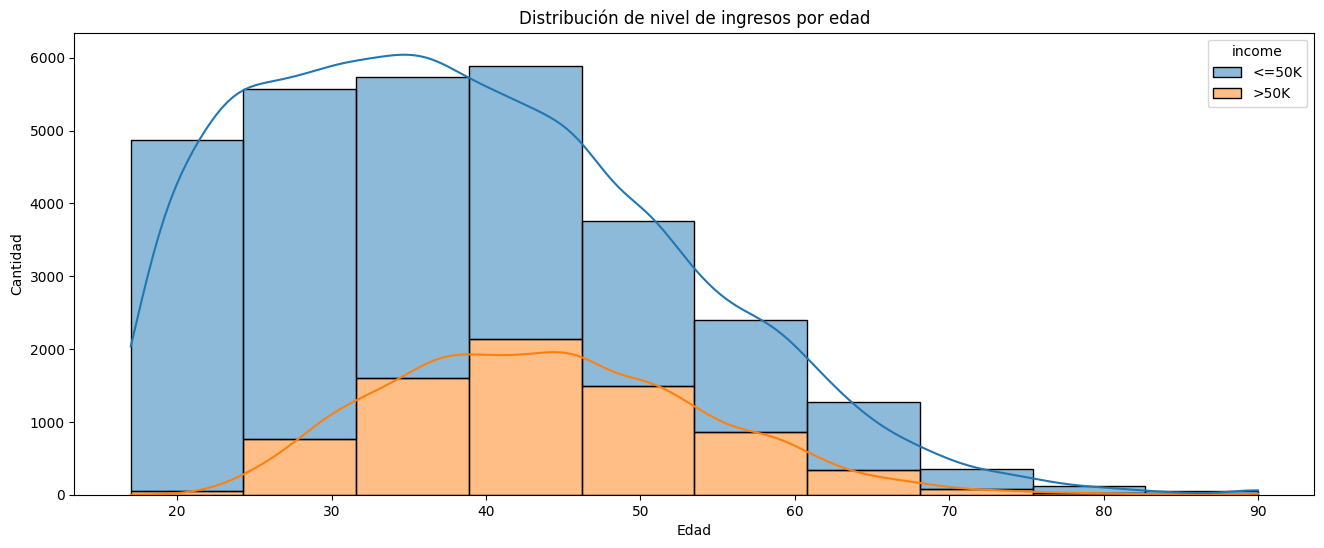

In [ ]:
plt.figure(figsize=(16,6))

sns.histplot(data=df, x="age", hue="income", multiple="stack", kde=True, bins=10)

plt.title("Distribución de nivel de ingresos por edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad")

plt.show()

> En el gráfico, se puede observar que la mayoría de personas con un ingreso superior a $50k, se encuentran dentro de la franja etaria que va desde aproximadamente los 25, a los 60 años. También se puede observar que el porcentaje relativo de las personas en cada franja de edad, con un ingreso mayor a >50k, incrementa a medida que se aumenta la edad.


8. Probabilidad de tener un ingreso >50k relativa al nivel de estudio.

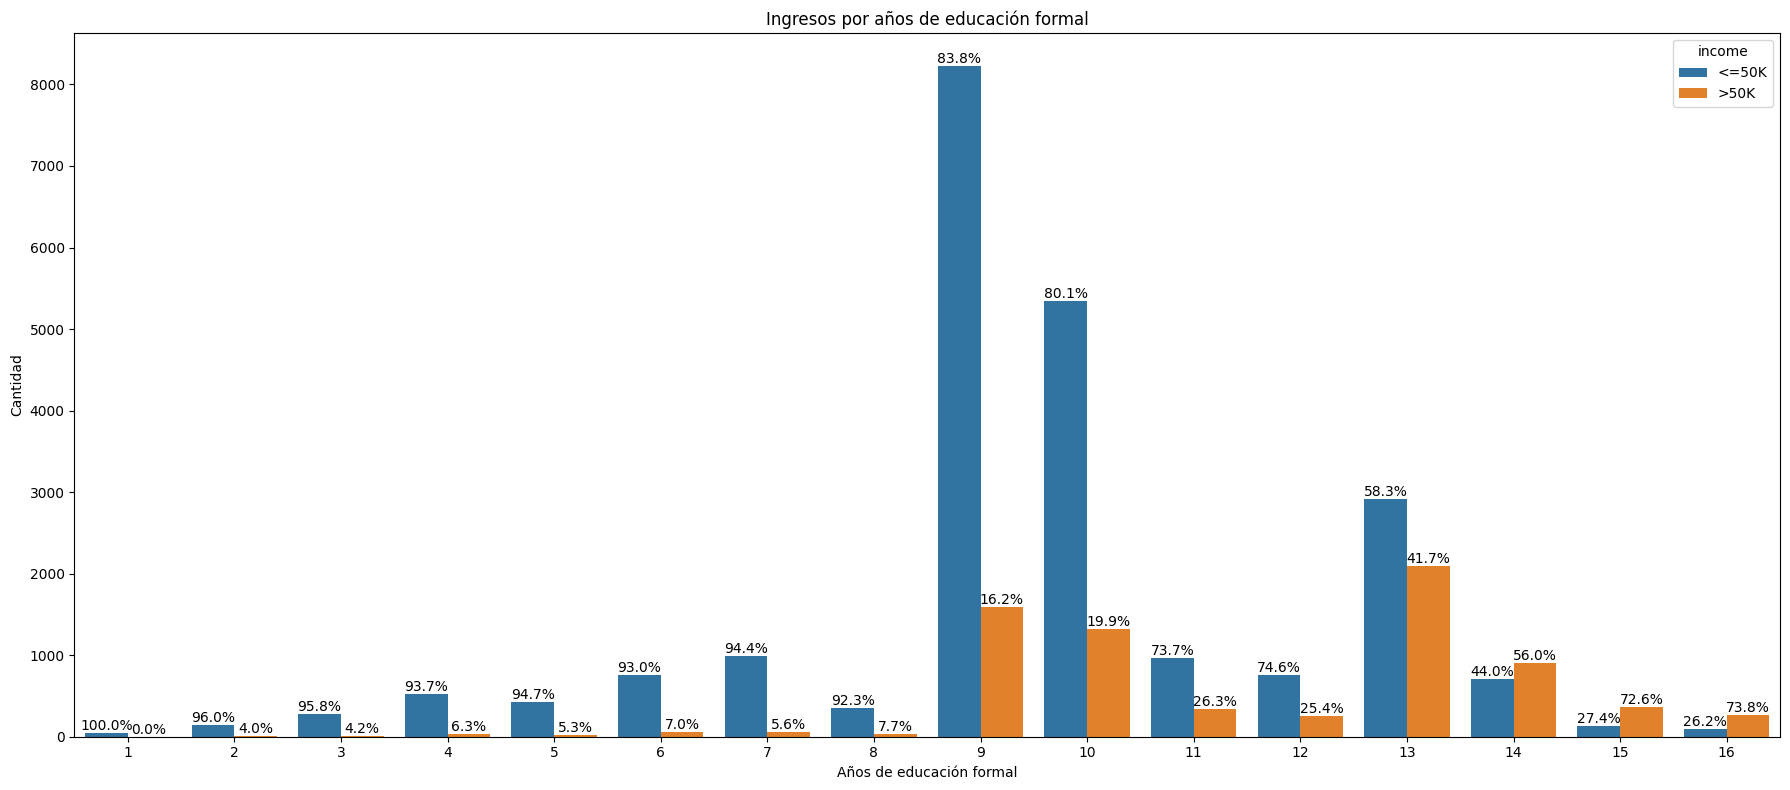

In [ ]:
# 1) Tabla de conteos y porcentajes
counts = (df.groupby(['education-num','income']).size().unstack(fill_value=0))
percentage = counts.div(counts.sum(axis=1), axis=0) * 100

# 2) Dibujo forzando mismo orden
fig, ax = plt.subplots(figsize=(18, 8))
incomes = counts.columns.tolist()
edus    = counts.index.tolist()

sns.countplot( data=df, x="education-num", hue="income")
ax.set(
    title="Ingresos por años de educación formal",
    xlabel="Años de educación formal",
    ylabel="Cantidad"
)

# Escribir % encima de cara barra
xticks    = ax.get_xticks()

for i, edu in enumerate(edus):
    for j, inc in enumerate(incomes):
        # x: desplaza desde el centro del grupo
        x = xticks[i] - 0.8/2 + bar_width/2 + j*bar_width
        y = counts.loc[edu, inc]                   # altura de la barra
        p = percentage.loc[edu, inc]               # porcentaje
        ax.text(x, y, f"{p:.1f}%",
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()




> En este gráfico se ve una fuerte tendencia de, **a razón de más años de educación formal, más posibilidades de tener un ingreso mayor a 50.000 dólares**, lo que sugiere que cada año adicional de educación puede traducirse en un aumento significativo cuasidirecto en los ingresos.
Además de eso, se evidencian saltos notables **a partir de los 13 años de educación formal, desde los cuales se tiene un 41.7% de posibilidades de tener un ingreso mayor a 50.000 dólares**, en comparación al 24.5% del total de los datos. Esta diferencia es aún más notable, si se compara a valores de educación formal más bajos.



9. Probabilidad relativa de tener un ingreso mayor a 50k por grupo de horas trabajadas.

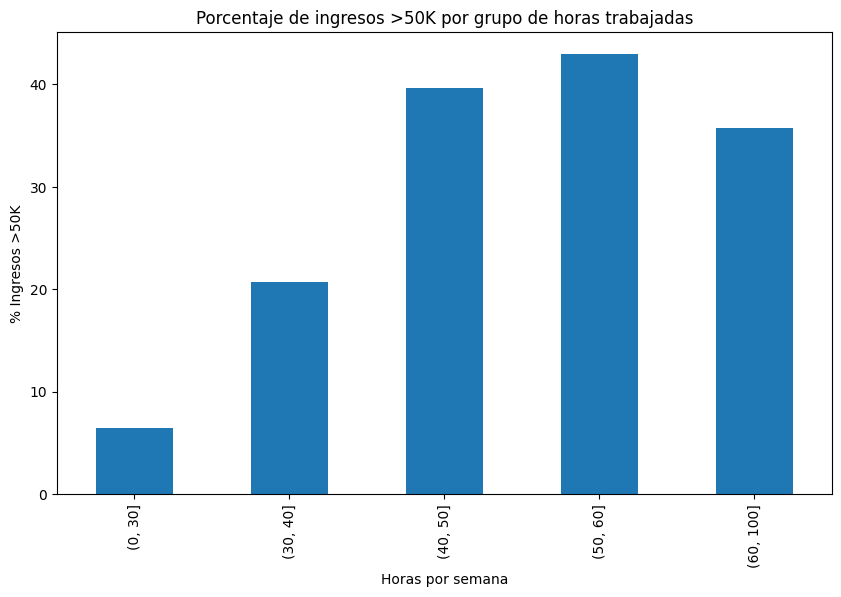

In [ ]:
# Crear bins para horas/semana
df['hours-group'] = pd.cut(df['hours-per-week'], bins=[0, 30, 40, 50, 60, 100])

# Porcentaje de >50K por grupo de horas
plt.figure(figsize=(10, 6))
(df.groupby('hours-group', observed=False)['income']
    .value_counts(normalize=True)
    .loc[:, '>50K']
    .mul(100) # Paso de fracción a porcentaje
    .plot(kind='bar'))
plt.title("Porcentaje de ingresos >50K por grupo de horas trabajadas")
plt.xlabel("Horas por semana")
plt.ylabel("% Ingresos >50K")
plt.show()



> Se ve un gran incremento en las posibilidades de tener un ingreso mayor a 50.000 dólares en la franja de las "( 40, 50 ]" horas, con beneficios decrecientes o incluso negativos a partir de allí.
El incremento notorio entre las franjas "( 30, 40 ]" y "( 40, 50 ], podría deberse a la diferencia en salarios a medio tiempo, en relación a trabajos de tiempo completo.



10. Distribución de ingresos con porcentaje relativo a cada raza.

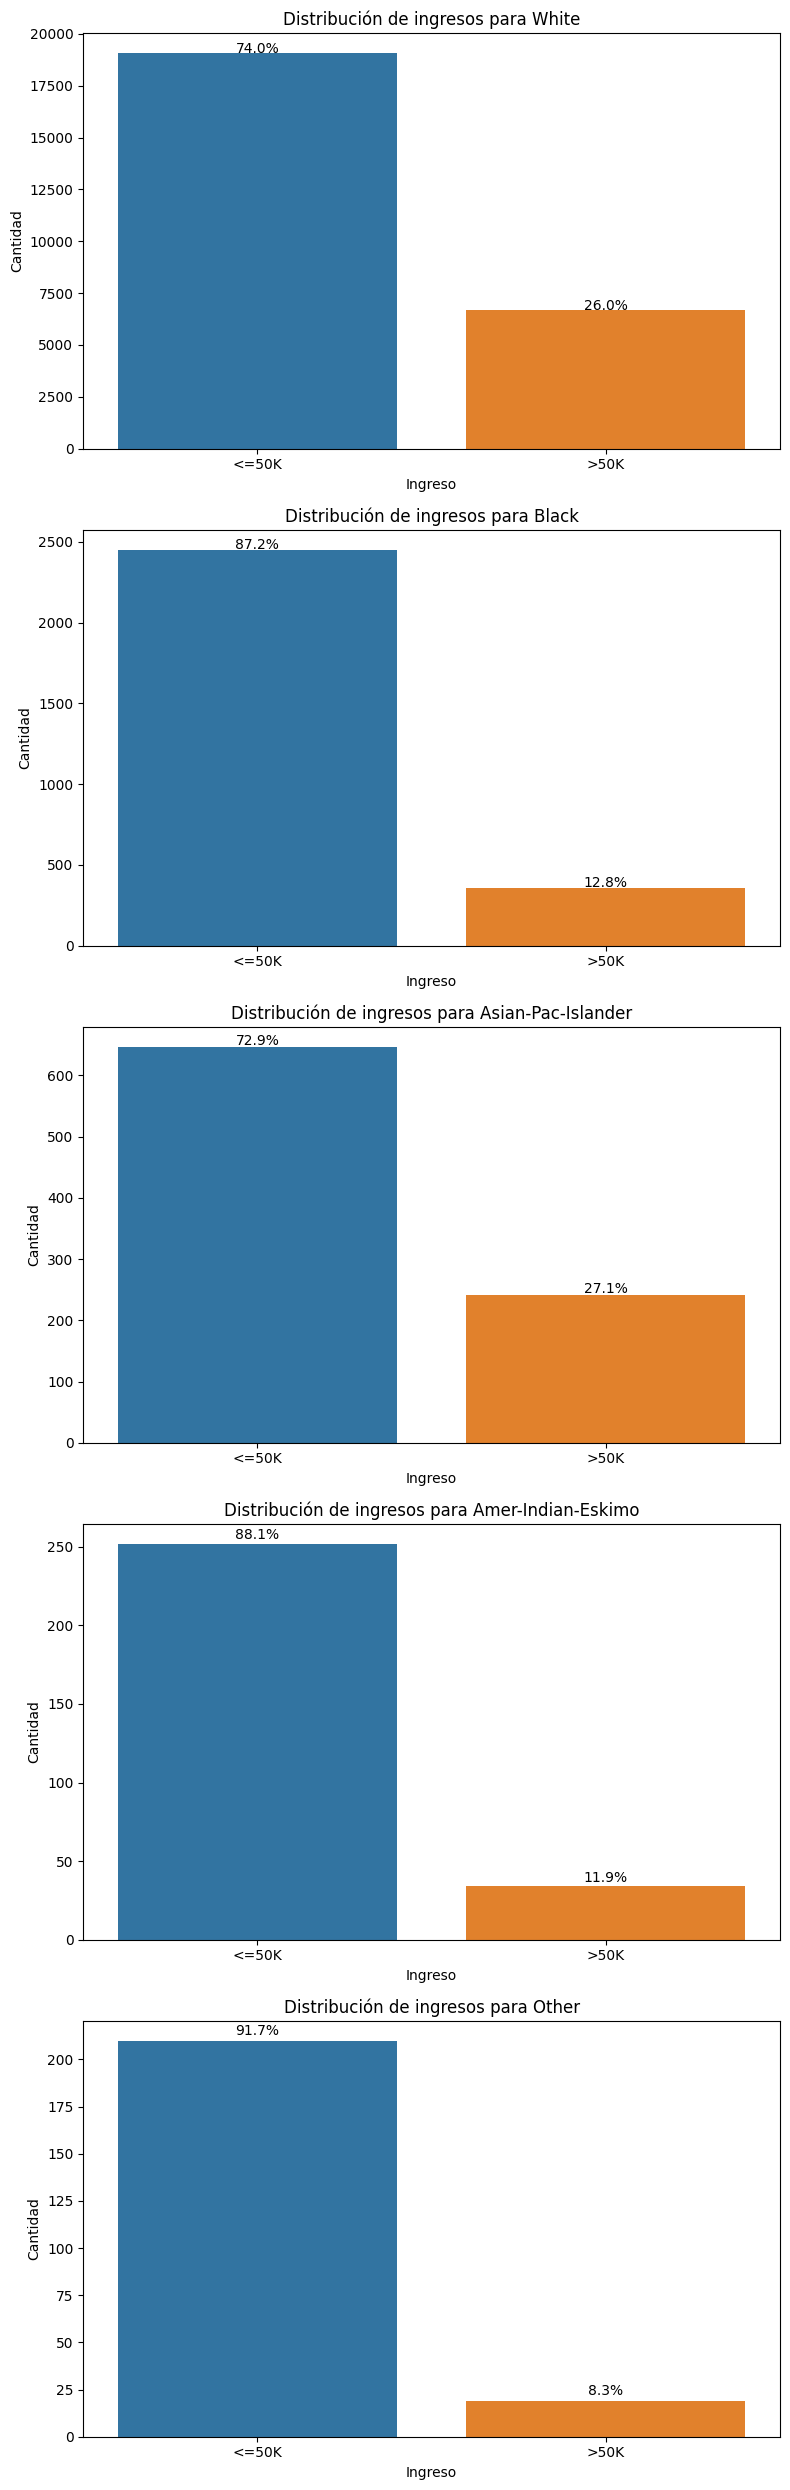

In [ ]:
# Obtengo las razas únicas
razas = df['race'].unique()

# Creo subplots: uno por cada raza
fig, axes = plt.subplots(len(razas), 1, figsize=(8, 5 * len(razas)))  # Una columna para cada raza

# Itero sobre cada raza
for i, raza in enumerate(razas):
    ax = axes[i]
    df_sub = df[df['race'] == raza]

    total = len(df_sub)

    sns.countplot(data=df_sub, x='income', hue='income', ax=ax, order=['<=50K', '>50K'], hue_order=['<=50K', '>50K'])

    # Agrego etiquetas de porcentaje
    for p in ax.patches:
        height = p.get_height()
        percentage = height / total * 100
        ax.text(p.get_x() + p.get_width()/2, height + 3, f'{percentage:.1f}%', ha='center')

    ax.set_title(f'Distribución de ingresos para {raza}')
    ax.set_xlabel('Ingreso')
    ax.set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


11. Distribución de ingresos con porcentaje relativo a cada raza y sexo.

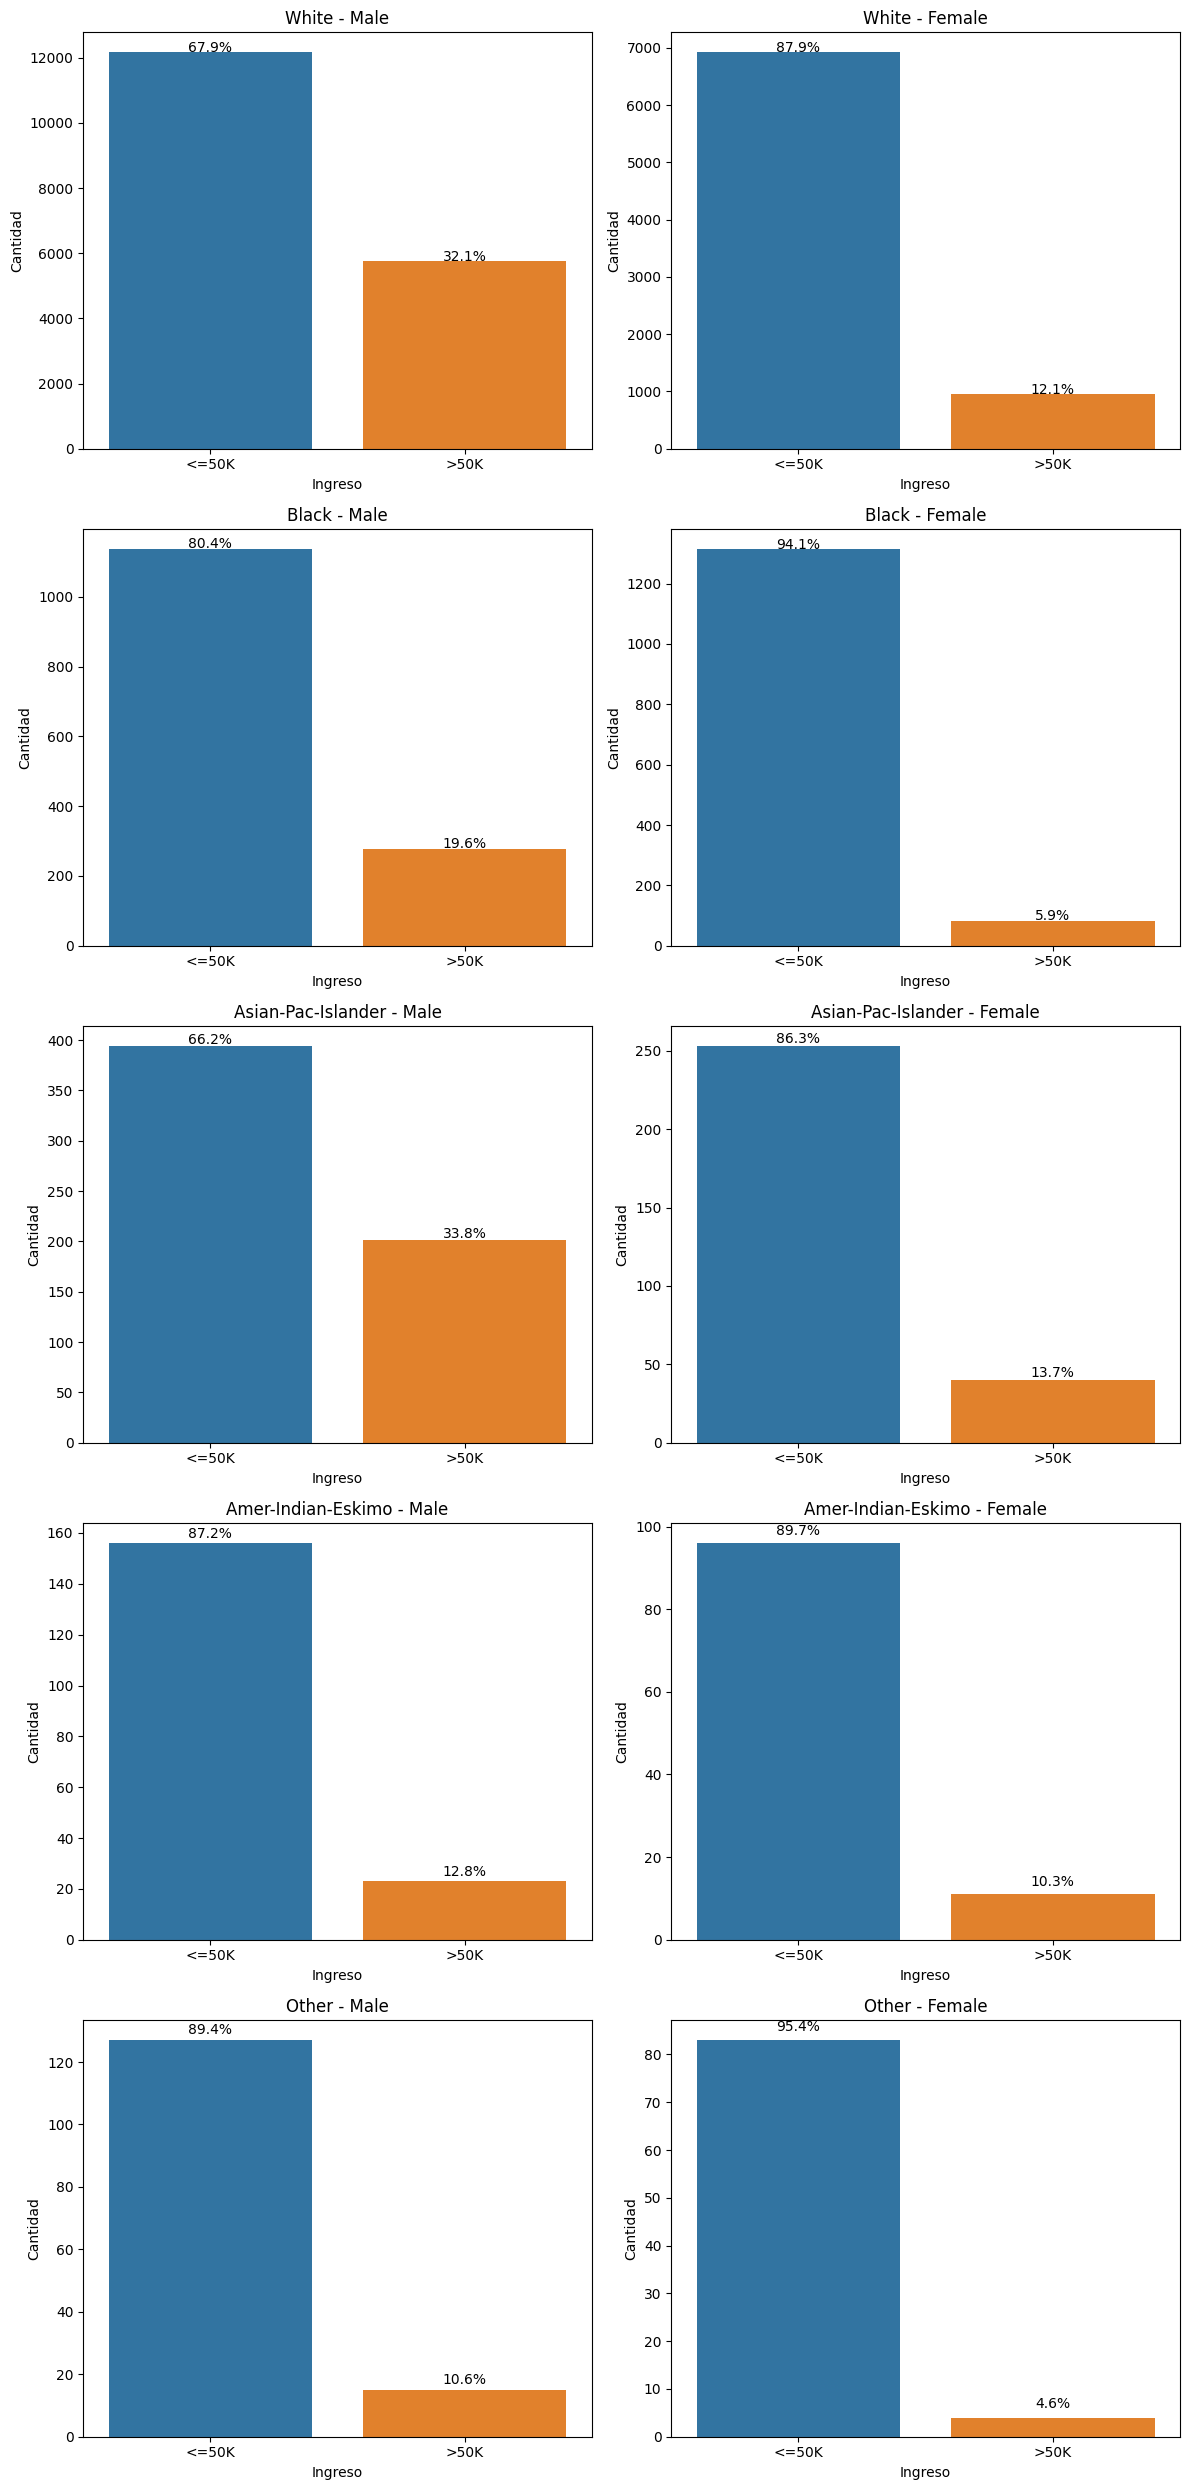

In [ ]:
# Obtengo los sexos únicos
sexos = df['sex'].unique()

# Creo los subplots raza por filas, y columnas por sexo
fig, axes = plt.subplots(len(razas), len(sexos), figsize=(6 * len(sexos), 5 * len(razas)))

# Itero sobre cada combinación raza/sexo
for i, raza in enumerate(razas):
    for j, sexo in enumerate(sexos):
        ax = axes[i][j]
        df_sub = df[(df['race'] == raza) & (df['sex'] == sexo)]

        total = len(df_sub)

        sns.countplot(data=df_sub, x='income', hue='income', ax=ax, order=['<=50K', '>50K'], hue_order=['<=50K', '>50K'])

        # Agrego etiquetas de porcentaje
        for p in ax.patches:
            height = p.get_height()
            percentage = height / total * 100
            ax.text(p.get_x() + p.get_width()/2, height + 2, f'{percentage:.1f}%',  ha='center')

        ax.set_title(f'{raza} - {sexo}')
        ax.set_xlabel('Ingreso')
        ax.set_ylabel('Cantidad')

plt.tight_layout()
plt.show()





> En todos los grupos étnicos, las mujeres tienen una proporción significativamente menor de ingresos superiores a 50.000 dólares en comparación con los hombres. Por ejemplo, entre las personas de raza blanca, el **32.1% de los hombres ganan más de 50.000 dólares**, mientras que **solo el 12.1% de las mujeres lo hacen**.
Otro dato notable, son **los hombres asiático-isleños del Pacífico, a pesar de no ser nativos de los Estados Unidos, y posiblemente tener barreras culturales en ciertas instancias debido a ello, son el grupo con la mayor proporción de ingresos superiores a 50.000 dólares (33.8%)**, mientras que las mujeres de este mismo grupo tienen una proporción mucho menor (13.7%), pero aún así superior al resto de las mujeres en otras razas, e incluso del sexo masculino de otras razas.





12. Distribución de horas trabajadas según raza, e ingreso.

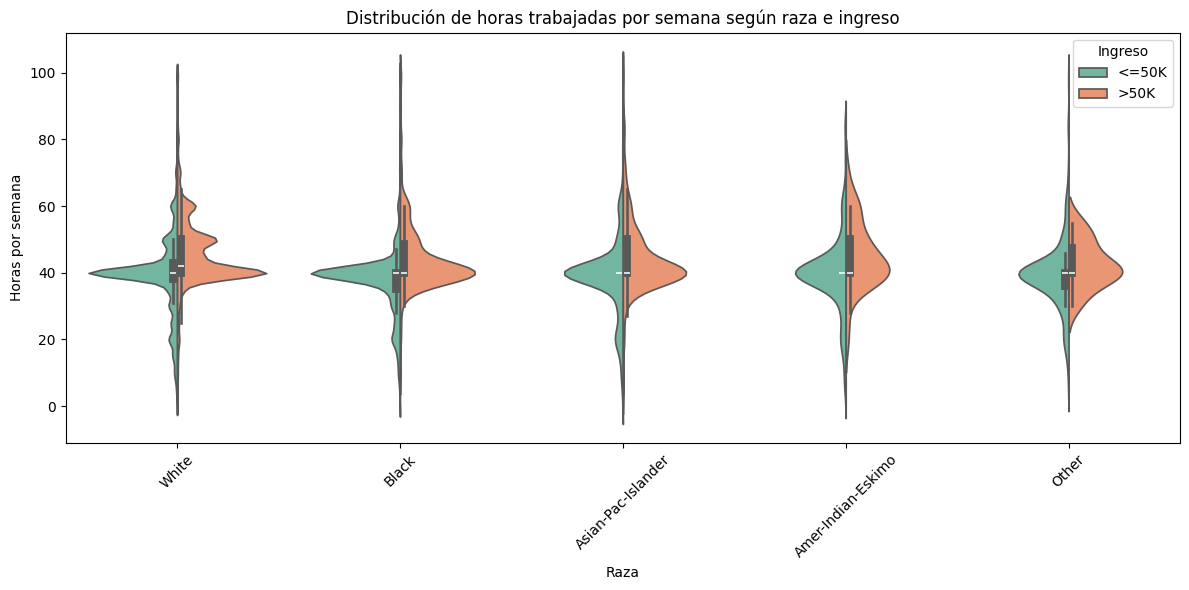

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='race', y='hours-per-week', hue='income', split=True, palette='Set2')

plt.title('Distribución de horas trabajadas por semana según raza e ingreso')
plt.xlabel('Raza')
plt.ylabel('Horas por semana')
plt.xticks(rotation=45)
plt.legend(title='Ingreso')
plt.tight_layout()
plt.show()



> En este gráfico se ve como **las personas con ingresos >50K tienden a trabajar más horas**, como visto anteriormente, (alrededor de 40-50 horas semanales) en todas las razas, mientras que por parte de **las personas que generan menos de <50K, tienen más variabilidad y suelen trabajar menos de 40 horas más consistentemente**. La raza no parece cambiar significativamente este patrón.



13. Distribución de años de educación formal según raza, y en relación a la posibilidad de tener un ingreso mayor a 50k.

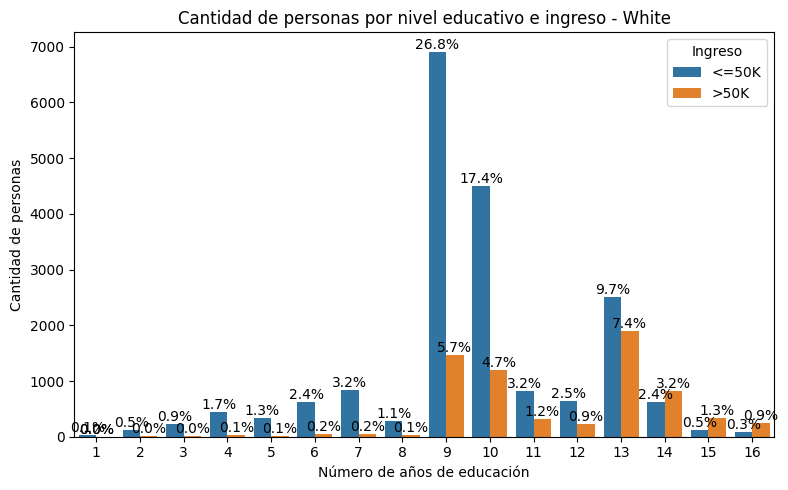

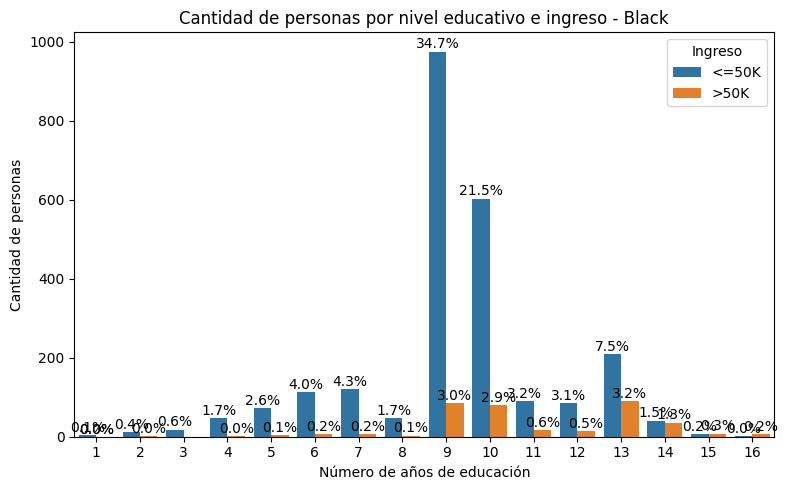

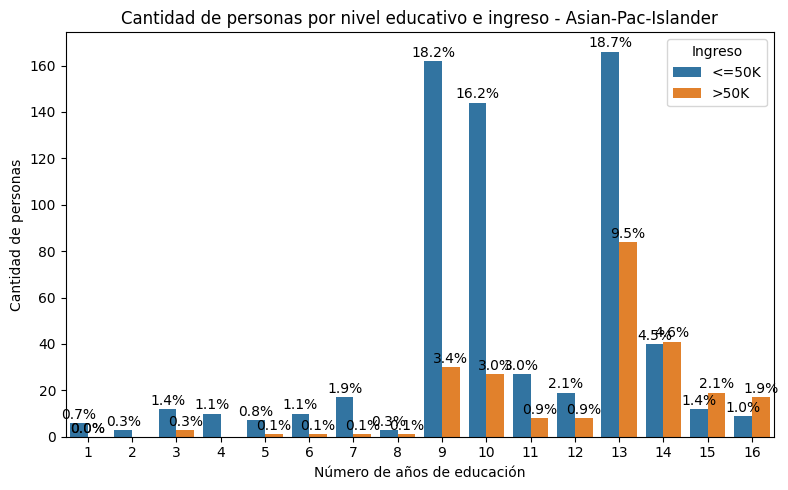

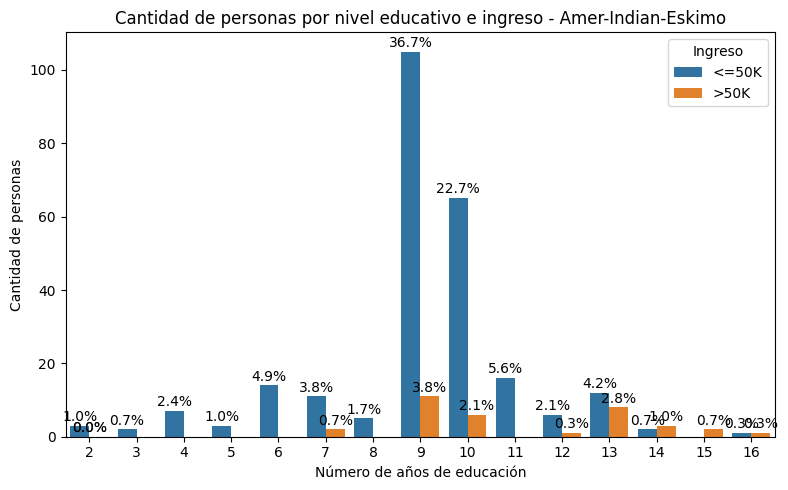

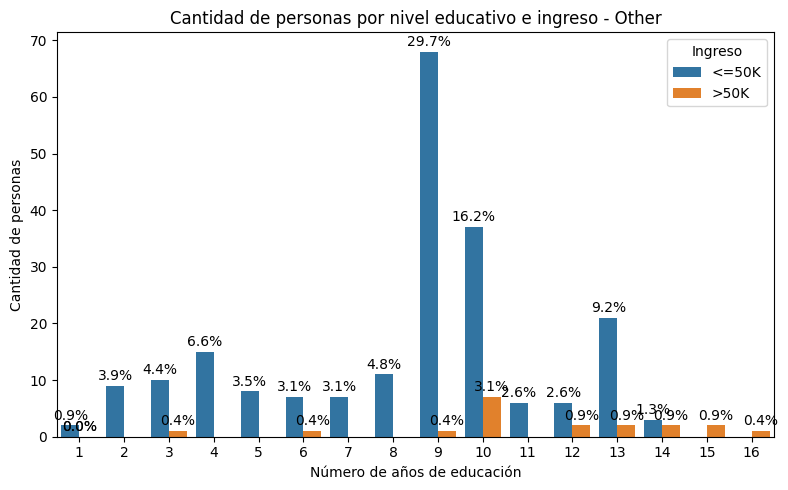

In [ ]:
# Loopeo para cada raza, y ploteo individualmente cada una.
for race in razas:
    plt.figure(figsize=(8, 5))
    subset = df[df['race'] == race]

    # Creo el countplot.
    ax = sns.countplot(data=subset, x='education-num', hue='income')

    # Obtengo la cantidad total de datos por raza y education-num, para crear el porcentaje luego
    total_count = len(subset)

    # Itero sobre cada barra para calcular el porcentaje
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_height()

        # Calculo el porcentaje relativo al total de cada raza
        percentage = (height / total_count) * 100

        # Agrego el porcentaje encima de cada barra
        ax.text(x, y + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

    # Título y etiquetas
    plt.title(f'Cantidad de personas por nivel educativo e ingreso - {race}')
    plt.xlabel('Número de años de educación')
    plt.ylabel('Cantidad de personas')
    plt.legend(title='Ingreso')
    plt.tight_layout()
    plt.show()



> En todos los grupos, **los ingresos >50K son más probables a medida que aumenta el nivel educativo** (**especialmente a partir de 13 años**). Esto nuevamente sugiere una relación positiva entre educación e ingreso como visto anteriormente.
Analizando los datos de los asiático-isleños del Pacífico, este grupo tiene una **importante proporción de personas con ingresos >50K en el rango 13-16** años de educación en comparación con otras razas.
**El nivel educativo más frecuente es de 10 años (16.1%)**, pero **hay un importante nivel sobre el total de dicha población, con un nivel educativo mayor a 9, siendo este un ~69% del total de asiáticos, contra un ~55.5 en el caso de la población blanca**.
Estas diferencias en años de formación, parecerían estar directamente relacionada con las diferencias en ingresos por grupos étnicos, por lo menos en este caso, ya que si se observase desde los 10 años de educación formal hacia atrás, la diferencia positiva de ingresos por parte de los asiático-isleños del Pacífico desaparece, y la raza blanca es la que mayor ingreso relativo tiene con niveles medios a bajos de estudio.


> También por otra parte, se puede ver como otros grupos como **los afrodescendientes e indios americo-Esquimales, tienen un menor nivel de ingresos relativo, en comparación a las personas de raza blanca en todos los niveles educativos**. Esto podría estar reflejando desigualdades estructurales, barreras económicas, o diferencias culturales que no les permiten estar en las mismas condiciones que el resto para competir por trabajos altamente remunerados.

#Entrenamiento del modelo.


1. Importo las librerías para el proyecto, cargo las urls de los datasets, los nombres de las columnas, y cargo los datasets a variables para trabajar sobre ellas, y muestro los datos.

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier


# URLs de los archivos
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

# Nombres de columnas
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Cargo los datasets
train = pd.read_csv(train_url, names=column_names, sep=',', skipinitialspace=True)
test = pd.read_csv(test_url, names=column_names, sep=',', skiprows=1, skipinitialspace=True)

# Muestro los primeros registros
display(train.head())
display(test.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


2. Hay ciertas filas en el dataset, que se encuentran "incompletas", representados valores faltantes con un signo de interrogación. En este punto, cambio el signo de interrogación por un valor nulo, y elimino las filas con esos valores usando numpy. También elimino columnas con información redundante, y quito el punto final a la fila de ingreso en el dataset de testeo, caracter que no se encuentra en los datos de entreno.

In [ ]:
# Elimino la columna redundante "education", de ambos datasets.
train.drop(columns=['education'], inplace=True)
test.drop(columns=['education'], inplace=True)


# Sustituyo los valores "desconocidos" por nulos
train.replace('?', np.nan, inplace=True)
test.replace('?', np.nan, inplace=True)

#Elimino valores de error de muestreo.



# Quito el punto al final de los atributos "income", en el dataset de testeo.
test['income'] = test['income'].apply(lambda x: x.rstrip('.'))

# Elimino las filas con valores nulos
train.dropna(inplace=True)
test.dropna(inplace=True)

#Muestro los datos, para verificar que los cambios se hayan realizado correctamente
print(f"Train rows: {len(train)}, Test rows: {len(test)}")
display(train.head())
display(test.head())



Train rows: 30162, Test rows: 15060


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


3. Separo, y preparo los datos para el modelado. Aplico OneHotEncoder, y escalado estandar. Posteriormente concateno estos valores escalados, con las variables codificadas.

In [ ]:
# Separo "income", del resto de valores para entrenar el modelo, y luego testearlo.
X_train = train.drop('income', axis=1)
y_train = train['income']

X_test = test.drop('income', axis=1)
y_test = test['income']

# Obtengo los nombres de columnas con datos categóricos.
categorical_cols = X_train.select_dtypes(include=['object']).columns

# defino los atributos de OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Aplico OneHotEncoder, cambiando las columnas categóricas.
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convierto las variables numéricas en un array
X_train_num = X_train.drop(columns=categorical_cols).to_numpy()
X_test_num = X_test.drop(columns=categorical_cols).to_numpy()

# Escalo las características numéricas.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# Concateno las variables numéricas escaladas con las categóricas codificadas
X_train_final = np.hstack([X_train_scaled, X_train_encoded])
X_test_final = np.hstack([X_test_scaled, X_test_encoded])

# Codifico income como 0 y 1 para simplificarlo, en lugar de una matriz con onehotencode.
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

4. Entreno el modelo. Corrigo el problema de desbalance de clases (más casos negativos que positivos) en el dataset. Ajusto el parametro scale_plos_weight=1.75 para compensar ese desbalance, entreno el modelo con x_train_final,

In [ ]:
# Uso xgboost para intentar mejorar el desempeño debido al imbalance entre casos positivos y negativos de x>50k
model = XGBClassifier(eval_metric='logloss', scale_pos_weight=1.75)

# Entreno el modelo
model.fit(X_train_final, y_train)

# Cargo
y_pred = model.predict(X_test_final)

# Evaluo scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=1))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=1))

Accuracy: 0.8583001328021248
Precision: 0.6915362035225049
Recall: 0.764054054054054
F1 Score: 0.7259887005649718


#Conclusiones

El análisis del dataset [“Adult” del censo de EE.UU. de 1994](https://archive.ics.uci.edu/dataset/2/adult) permitió evidenciar múltiples desigualdades estructurales en los ingresos de la población, asociadas principalmente al género, el nivel educativo, y el grupo étnico en los Estados Unidos en la década de los 90'.

En primer lugar, se observó una clara brecha; los hombres tienen, una mayor probabilidad de superar los $50.000 anuales en ingresos, tendencia que se mantiene incluso al controlar por nivel educativo, aunque se reduce en los niveles más altos de formación, y se puede explicar *en parte* por la carga horaria. Esto sugiere que la educación formal y la carga horaria, pueden ser factores mitigante, pero no suficiente por sí solos para eliminar la desigualdad de género, o factores externos que interfieran ante los individuos para acceder a trabajos mejores pagos.

Además, los datos muestran una relación directa entre años de educación formal e ingresos, destacando que a partir de los 13 años de escolaridad las probabilidades de tener ingresos elevados aumentan significativamente. También se evidenció que los grupos que tienden a tener más años de educación formal, como los asiático-isleños del Pacífico, poseen ingresos relativamente más altos, reforzando la idea de que la educación es un factor determinante aunque no el único, en la distribución de los ingresos.

Respecto a los grupos étnicos, las desigualdades también son notorias: mientras que los hombres blancos y asiáticos presentan mayores proporciones de ingresos elevados, otros grupos como los afrodescendientes o nativos americanos muestran menores niveles de ingreso, incluso con niveles educativos similares. Esto puede indicar la existencia de barreras estructurales y discriminación que va más allá de la educación y el esfuerzo individual, o a diferencias culturales y de entorno.

En cuanto a la carga laboral, se identificaron diferencias importantes según el estado civil y el género, donde los hombres, particularmente los que en algún momento fueron casados, tienden a trabajar más horas semanales, posiblemente reflejando roles sociales tradicionales.

Finalmente, el modelo de inteligencia artificial desarrollado, entrenado con las variables más influyentes, permitió predecir con cierta precisión si una persona gana más o menos de 50.000 dólares anuales, siendo según los análisis anteriores, el nivel educativo, el sexo, la edad y las horas trabajadas los factores más determinantes.

En conclusión si bien la educación y la experiencia laboral impactan significativamente en los ingresos, existen desigualdades por género y etnia que con los datos presentes no son capaces de explicarse, lo que señala la necesidad de más investigación en el por qué existen estas diferencias, si es por factores de preferencias individuales, factores biológicos, culturales, estructurales en la sociedad, o de cualquier otra índole.



---


Autor: *Santiago Burgueño*

**Maldonado, Uruguay.**